In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import nbimporter
from Functions import residual_analysis, plot_multiple, time_stamp

Importing Jupyter notebook from Functions.ipynb


In [2]:
X_train=np.load('/home/maxlavech/StressStrain_Project/10_DNN_Approach/X_train_B20_15000.npy')
y_train=np.load('/home/maxlavech/StressStrain_Project/10_DNN_Approach/y_train_B20_15000.npy')
X_test=np.load('/home/maxlavech/StressStrain_Project/10_DNN_Approach/X_test_B20_15000.npy')
y_test=np.load('/home/maxlavech/StressStrain_Project/10_DNN_Approach/y_test_B20_15000.npy')

### Performance of the model with Back_To_Zero Linear Strain

#### Example of Back_to_Zero Linear Strain

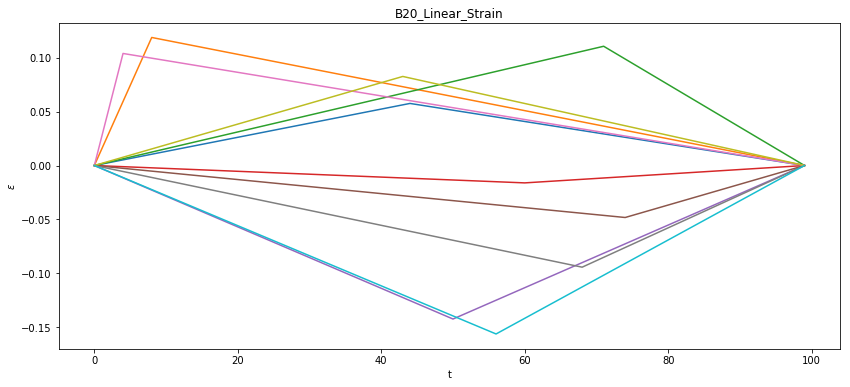

In [29]:
plt.title('B20_Linear_Strain')
plt.xlabel('t')
plt.ylabel('$\epsilon$')
for i in range(10):
    plt.plot(strain_test[i])
plt.show()

#### Results

In [4]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp/step4/model.ckpt")
    sess.run(test_init)
    try:
        while True:
            strain_test,stress_test,stress_pred = sess.run([strain,stress,final_output])
    except tf.errors.OutOfRangeError:
        pass

INFO:tensorflow:Restoring parameters from ./tmp/step4/model.ckpt


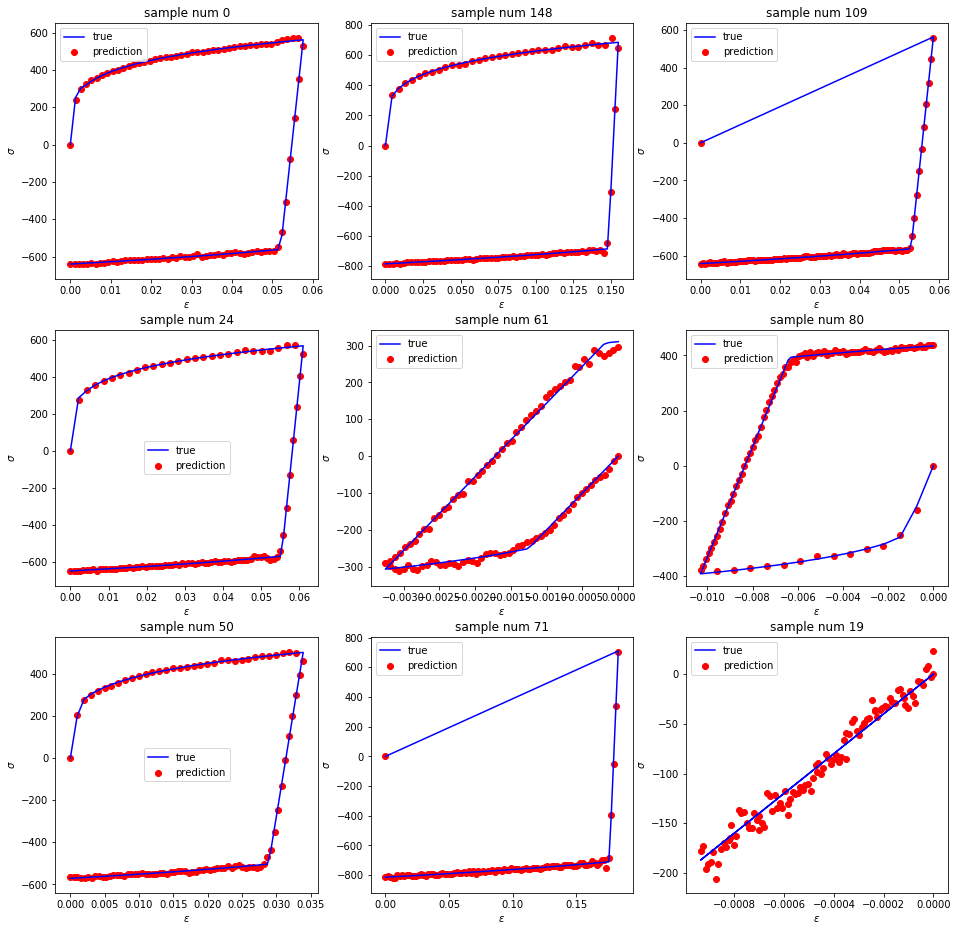

In [5]:
plot_multiple(strain_test,stress_test,stress_pred)

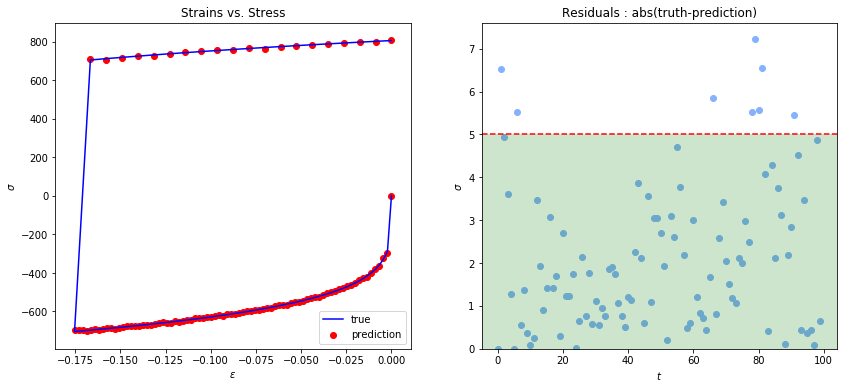

In [7]:
residual_analysis(strain_test,stress_test,stress_pred,32)

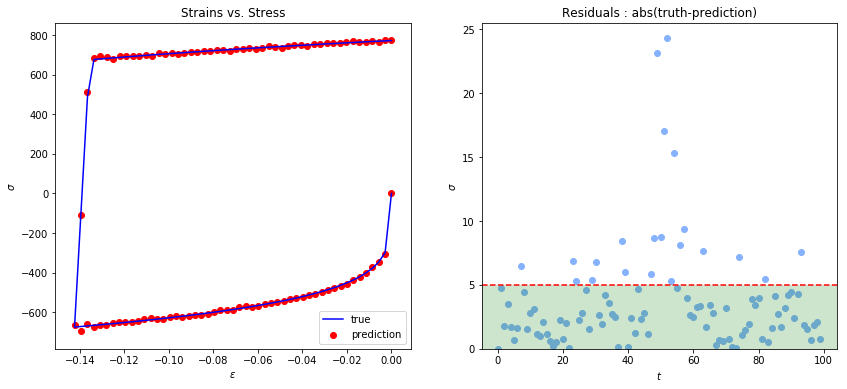

In [12]:
residual_analysis(strain_test,stress_test,stress_pred,4)

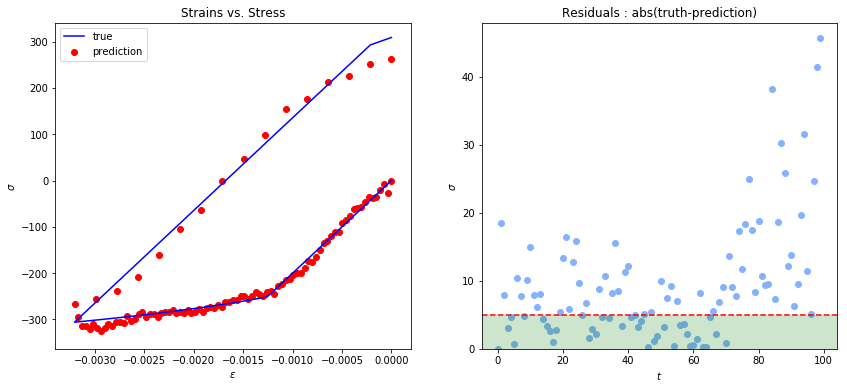

In [14]:
residual_analysis(strain_test,stress_test,stress_pred,67)

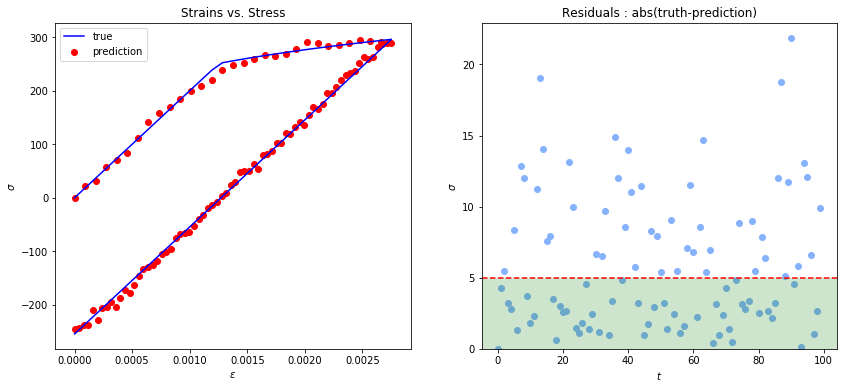

In [24]:
residual_analysis(strain_test,stress_test,stress_pred,12)

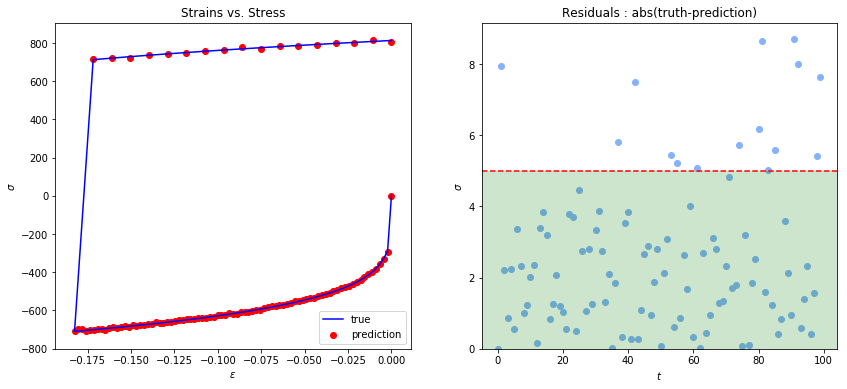

In [26]:
residual_analysis(strain_test,stress_test,stress_pred,123)

So the model is essentially performing poorly on strains which have low amplitude. However, the model could be improved with more targeted data : building a training set with more data, and a fix number of samples for each interval of amplitude. The fine tuning of the model could be improved by increasing number of epochs for the first step, trying multiple initialization before sticking to one and training the whole model. Finally maybe slightly augmenting the number of neurons in each layer could actually help. We want to retrain the model before going to a model with 4 hidden layers.